# Vähimruutude meetod, regressioonanalüüs ja funktsioonide sobitamine

<div style="float: left;">Valter Kiisk<br><span style="font-size: 75%;">TÜ Füüsika Instituut</span></div><div style="float: right;">Viimati muudetud: 7.02.2019</div>
<div style="display:none">
$\renewcommand{\vec}{\boldsymbol}$
$\newcommand{\erf}{\mathop{\rm erf}\nolimits}$
$\newcommand{\cov}{\mathop{\rm cov}\nolimits}$
$\newcommand{\aver}[1]{\langle #1 \rangle}$
$\newcommand{\eps}{\varepsilon}$
$\newcommand{\expval}{\mathop{\rm E}\nolimits}$
$\newcommand{\dispers}{\mathop{\rm D}\nolimits}$
</div>

In [3]:
# üldised vahendid ja seadistused
import numpy as np
from numpy import linspace, arange, exp, sin, sqrt, meshgrid
from numpy.random import randn, poisson
from matplotlib.pyplot import *
from matplotlib import rcParams

def axtext(x, y, s, **kwargs):
    annotate(s, (x, y), xycoords='axes fraction',
             backgroundcolor='white', fontsize='small', **kwargs)

In [4]:
rcParams['figure.dpi'] = 100
rcParams['lines.markeredgewidth'] = 0
rcParams['lines.markersize'] = 5
rcParams['font.size'] = 12
rcParams['legend.fontsize'] = 'small'
rcParams['axes.prop_cycle'] = cycler('color', 'bgrmc')

## Sissejuhatus

Tüüpiline numbriline arvutusprobleem loodus- ja inseneriteadustes on teooria "sobitamine" katseandmetega, st mudelis sisalduvate vabade parameetrite timmimine kuni mudel on "parimas kooskõlas" eksperimendiga. See tähendab harilikult mõnesuguse mudelfunktsiooni sobitamist läbi katsepunktide (*curve fitting*). Otsapidi kuulub see tegevus [regressioonanalüüsi](https://en.wikipedia.org/wiki/Regression_analysis) alla, mis statistiliste meetoditega püüab tuvastada muutujate vahelisi seoseid ja korrelatsioone. Samas, funktsiooni sobitamine läbi mingite tabuleeritud andmete võib olla ka puhtalt matemaatiline eesmärk (ilma füüsikalise vm tagamõtteta).

Olgu meil kaks füüsikalist suurust $x$ ja $y$, kus $x$ on sõltumatu muutuja (mille määramatus on eeldatavasti tühine) ja $y$ on mõõdetav (ja mõõteviga omav) suurus. Me arvame, et $y$ sõltub $x$-st vastavalt seosele $y=f(x,\vec{p})$, kus funktsioon $f$ on teada, aga selles sisaldub hulk parameetreid $\vec{p}=(p_1,p_2,\ldots,p_m)$, mille väärtusi me ei tea. Oletagem, et eksperimentaalne sõltuvus on tabuleeritud katsepunktidena $(x_i,y_i)$. Andes vabadele parameetritele esialgu mingid hinnangulised väärtused, saame $$y_i=f(x_i,\vec{p})+\varepsilon_i,$$ kus $\varepsilon_i$ iseloomustab mudeli viga $y_i$ väärtuse ennustamisel. Ilmselt mõõtemääramatuse või ka mudeli puudulikkuse tõttu me ei saavuta kunagi olukorda, kus kõik $\varepsilon_i=0$ (erinevalt [interpoleerimisest](interp.html)). Parim, mida saab teha, on nende vigade minimeerimine mingi kriteeriumi järgi.

## Suurima tõepära printsiip ja vähimruutude meetod

Eeldame et $y_i$ on normaaljaotusega juhuslik suurus ja optimeeritud mudeliga arvutatud väärtust $f(x_i,\vec{p})$ interpreteerime kui $y_i$ keskväärtust. Nendel eeldustel konkreetse $y_i$ realiseerumise tõenäosus on võrdeline $\exp[-\varepsilon_i^2/(2\sigma_i^2)]$-ga, kus $\sigma_i$ on $y_i$ standardhälve. *Suurima tõepära printsiip* näeb ette, et parameetrid $\vec{p}$ tuleks valida nii, et mõõdiste komplekti $y_i$ saamise tõenäosus oleks maksimaalne. Oletame esialgu, et kõik katsepunktid on ühesuguse määramatusega, siis tuleb lihtsalt maksimeerida korrutis $$e^{-(\varepsilon_1)^2}e^{-(\varepsilon_2)^2}\ldots e^{-(\varepsilon_n)^2} = \exp\left(-\sum \varepsilon_i^2 \right)$$ ehk minimeerida hälvete ruutude summa $\sum \varepsilon_i^2$ ehk funktsioon $S(\vec{p})=\sum [y_i-f(x_i,\vec{p})]^2$, mis ongi [vähimruutude meetod](https://en.wikipedia.org/wiki/Least_squares). Juhul kui on eraldi teada kõik $\sigma_i$, saame üldisemalt $$S(\vec{p})=\sum \frac{[y_i-f(x_i,\vec{p})]^2}{\sigma_i^2}.$$ Teiste sõnadega, katsepunkti $(x_i,y_i)$ võetakse arvesse kaaluga $1/\sigma_i^2$. Esineb olukordi, kus füüsikalistel alustel on juba *a priori* teada $\sigma_i$ absoluutne väärtus (nt [haavelmüra](https://en.wikipedia.org/wiki/Shot_noise) tõttu). Sel juhul pn mõttekas pärast optimeerimist välja arvutada lähenduse kvaliteeti iseloomustav karakteristik ([reduced chi-squared](https://en.wikipedia.org/wiki/Reduced_chi-squared_statistic)) $$\chi^2=\frac{1}{n-m}\sum \frac{[y_i-f(x_i,\vec{\hat{p}})]^2}{\sigma_i^2},$$ kus $\vec{\hat{p}}$ on $\vec p$ väärtus, mis minimeerib $S(\vec p)$. Juhul kui valitud mudelfunktsioon adekvaatselt kirjeldab katsepunkte, siis selle erinevus igast $y_i$-st ongi parajasti $\sigma_i$ suurusjärgus, nii et $\chi^2\sim 1$. Kui $\chi^2\gg 1$, on mudel liiga jäme, kui aga $\chi^2 < 1$, on süsteem juba ülemääratud (katsepunkte liiga vähe või vabu parameetreid liiga palju).

## Regressioonsirge

Lihtsaim mudel on proportsionaalne sõltuvus $y=ax$, kus sirge tõus $a$ on ainus varieeritav parameeter. Kui kõik katsepunktid on sama kaaluga, siis sihifunktsiooniks on $S(a)=\sum_i(y_i-ax_i)^2$. Funktsiooni [ekstreemum](https://en.wikipedia.org/wiki/Maxima_and_minima) asub kohal $a=\hat{a}$, kus tuletis saab nulliks: $$\left(\frac{dS}{da}\right)_{\hat a}=2\sum_i(y_i-\hat{a}x_i)x_i=0,$$ millest $$\hat{a}=\frac{\sum x_iy_i}{\sum x_i^2}.$$ Ilmselt korrutis $\hat{a}x_i$ on hinnang $y_i$ keskväärtusele. Seega saame hinnata ka $y$ dispersiooni (arvestades statistilist vabadusastmete arvu $n-1$): $$s^2=\frac{\sum (y_i-\hat{a}x_i)^2}{n-1}.$$ Arvestades [dispersiooni omadusi](tts.html), saame omakorda hinnata $\hat{a}$ määramatust: $$\dispers{(\hat{a})}=\dispers\left(\frac{\sum x_iy_i}{\sum x_i^2}\right)=\frac{\sum x_i^2\dispers{(y_i)}}{\left(\sum x_i^2\right)^2}= \frac{\dispers{(y_i)}}{\sum x_i^2}\implies u(\hat a)=\frac{s^2}{\sum x_i^2}.$$

Veidi üldisem mudel on lineaarne seos $y=ax+b$, kus on lubatud varieerida ka algordinaati $b$. Sel juhul $S(a,b)=\sum_i(y_i-ax_i-b)^2$. Mitmemuutuja funktsiooni ekstreemumis on osatuletised kõigi argumentide järgi nullid. Seega saame kaks võrrandit $$\left(\frac{\partial S}{\partial a}\right)_{\hat{a},\hat{b}}=0,\quad \left(\frac{\partial S}{\partial b}\right)_{\hat{a},\hat{b}}=0.$$ Siit tekib lineaarne võrrandisüsteem $\hat{a}$ ja $\hat{b}$ suhtes, ja selle lahend avaldub kujul:
$$\hat{a}=\frac{n\sum x_iy_i-\sum x_i\sum y_i}{n\sum x_i^2-(\sum x_i)^2},\quad \hat{b}=\frac{\sum x_i^2\sum y_i-\sum x_i\sum x_iy_i}{n\sum x_i^2-(\sum x_i)^2}$$ kus $n$ on katsepunktide arv. Need valemid võib väljendada ka lihtsamal kujul $$\hat{a}=\frac{\aver{xy}-\aver{x}\aver{y}}{\aver{x^2}-\aver{x}^2},\quad \hat{b}=\frac{\aver{x^2}\aver{y}-\aver{x}\aver{xy}}{\aver{x^2}-\aver{x}^2}=\aver{y}-\hat{a}\aver{x},$$ kus $\aver{\ldots}$ tähendab aritmeetilise keskmise arvutamist. Viimane seos näitab ühtlasi, et selline regressioonsirge kulgeb läbi andmete keskpunkti $(\aver{x}, \aver{y})$.

Analoogiliselt proportsionaalse sõltuvuse juhuga saab leida parameetrite standardmääramatused: $$u(\hat a)^2= \frac{s^2}{n\left(\aver{x^2}-\aver{x}^2\right)},\quad u\left(\hat b\right)^2=\frac{s^2}{n} + \aver{x}^2 u(\hat a)^2,$$ kus $$s^2=\frac{\sum (y_i-\hat{a}x_i - \hat{b})^2}{n-2}.$$

$\hat{a}$, $\hat{b}$ ja $u(\hat a)$ algoritmid realiseerib `scipy.stats.linregress`. Ülejäänud kvantiteedid tuleb ise arvutada:

a = 2.92 ± 0.28
b = 7.26 ± 0.81
s = 1.88


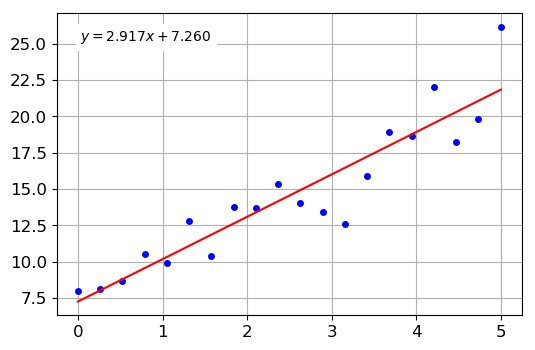

In [28]:
from scipy.stats import linregress

# simuleerime andmed
n = 20
X = linspace(0, 5, n)
Y = 3 * X + 7 + 2 * randn(n)

# sobitame sirge
a, b, _, _, ua = linregress(X, Y)
Y1 = a * X + b
s = np.sqrt( ((Y - a * X - b)**2).sum() / (n - 2) )
ub = np.sqrt( s**2 / n + (X.mean() * ua)**2 )

# tulemuste väljatrükk
print( 'a = %.2f ± %.2f' % (a, ua) )
print( 'b = %.2f ± %.2f' % (b, ub) )
print( 's = %.2f' % s )

# graafik
plot(X, Y, 'bo')
plot(X, Y1, 'r-')
axtext(0.05, 0.95, '$y=%.3fx+%.3f$' % (a, b), va='top')
grid()
show()

## Üldine lineaarne regressioonülesanne

Isegi kui füüsikaline mudel ei ole teada (või on liiga keeruline), on sageli võimalik ja õigustatud suure müraga katselise sõltuvuse siledaks aproksimeerimiseks kasutada mingit piisavalt paindlikku matemaatilist funktsiooni, millel füüsikalist põhjendust ei pruugi olla. Kõige lihtsam sedalaadi funktsioon on *polünoom* $y=a_0x^m+a_1x^{m-1}+\ldots+a_m$. (Kui katsepunktide määramatus on väike, siis võib mõistlikum olla [interpoleerimine](interp.html).)

Numbrilise stabiilsuse huvides võiks astmefunktsioonide $x^k$ asemel kasutada ka mõnda muud funktsioonide komplekti, nt [Tšebõšovi polünoome](https://en.wikipedia.org/wiki/Chebyshev_polynomials), [trigonomeetrilisi funktsioone](https://en.wikipedia.org/wiki/Fourier_series), vms. Seega üldiselt võime mudelfunktsioonina vaadelda mistahes kindlate baasfunktsioonide $\varphi_j(x)$ lineaarkombinatsiooni:
\begin{equation}
y=p_1\varphi_1(x)+p_2\varphi_2(x)+\ldots+p_m\varphi_m(x)=\sum_j p_j\varphi_j(x).\qquad (1)
\end{equation}
Valemiga (1) esindatud funktsiooni sobitamine läbi katsepunktide (kus kõik $\varphi_j(x)$ on antud ja tuleb leida optimaalsed kordajad $p_j$) esindab üldist lineaarset regressioonülesannet. Toome sisse veeruvektorid $\vec{p}=(p_1,\ldots,p_m)^\text{T}$, $\vec{y}=(y_1,\ldots,y_n)^\text{T}$ ning maatriksi $\vec{X}$ elementidega $X_{ij}=\varphi_j(x_i)$. Sel juhul mudel ennustab kohal $x_i$ signaali väärtuseks $(\vec{X}\vec{p})_i$. Katse ja teooria erinevuste vektor on seega $\vec{y}-\vec{X}\vec{p}$, nii et vähimruutude mõttes tuleb minimeerida selle vektori pikkuse ruut $\|\vec{y}-\vec{X}\vec{p}\|^2$ (elementide ruutude summa). Lihtne analüüs (osatuletised kõigi $p_j$ järgi peavad võrduma nulliga) viib lineaarse võrrandisüsteemini:
\begin{equation}
(\vec{X}^\text{T}\vec{X})\vec{\hat{p}}=\vec{X}^\text{T}\vec{y}.\qquad (2)
\end{equation}
Erinevalt $\vec{X}$-st on $\vec{X}^\text{T}\vec{X}$ juba ruutmaatriks (eeldatavasti täisastakuga ehk nullist erineva determinandiga), nii et süsteem on üheselt lahenduv. Teades nüüd optimaalset $\vec{p}$ väärtust, saame edasi arvutada $y_i$ statistilise määramatuse: $$s^2=\frac{\|\vec{y}-\vec{X}\vec{\hat{p}}\|^2}{n-m}.$$ Võrrandisüsteemist (2) saab $\vec{\hat{p}}$ otseselt avaldada maatrikskujul: $$\vec{\hat{p}}=(\vec{X}^\text{T}\vec{X})^{-1}\vec{X}^\text{T}\vec{y}.$$ Kuigi võrrandisüsteemi lahendamise seisukohalt pole pöördmaatriksi väljaarvutamine mõistlik, saab selle tulemuse baasil välja arvutada $\vec{\hat{p}}$ kovariatsioonimaatriksi: $$\cov(\vec{\hat{p}})=s^2(\vec{X}^\text{T}\vec{X})^{-1},$$ mille diagonaalelemendid on $\hat{p}_j$ määramatused ja mitte-diagonaalelemendid väljendavad korrelatsioone erinevate $\hat{p}_j$-de vahel.

Vaatleme näitena konkreetset stsenaariumi, kus kerkib esile selline matemaatiline probleem. Kujutleme optiliselt läbipaistvat keskkonda (näiteks vesi), milles on väheses koguses lahustunud mitme erineva aine molekule. Sel juhul komponent $j$ panustab valguse neelduvusse $A$ (teatud lainepikkusel $\lambda$) võrdeliselt oma kontsentratsiooniga $c_j$, nii et kogu neelduvus lainepikkusel $\lambda$ avaldub: $$A(\lambda)=c_1\alpha_1(\lambda)+c_2\alpha_2(\lambda)+\ldots+c_m\alpha_m(\lambda).$$ Kontsentratsioone $c_j$ me esialgu ei tea. Olgu $A$ väärtused mõõdetud diskreetse sammuga üle teatud spektriala (lainepikkustel $\lambda_1,\lambda_2,\ldots, \lambda_n$). Samadel lainepikkustel mõõdetakse eraldi ka iga puhta aine neelduvus $\alpha_j$ (sel juhul $c_j=1$). Järelikult saame koostada $m$ võrrandit: $$A(\lambda_i)=c_1\alpha_1(\lambda_i)+c_2\alpha_2(\lambda_i)+\ldots+c_m\alpha_m(\lambda_i)+\varepsilon_i.$$ Juhul kui võtta $\varepsilon_i=0$, oleks see lineaarne võrrandisüsteem tundmatute $c_j$ määramiseks, aga ilmselt võrrandite (st erinevate lainepikkuste) arv $n$ on hulga suurem kui keemiliste komponentide arv $m$, seega võrrandisüsteem on ülemääratud. Lisaks kaasneb $A$ mõõtmisega ka teatud määramatus (müra), nii et katsepunktide äraviskamine pole õigustatud. Siiski saab võrrandisüsteemi lahendada selles mõttes, et minimeerida võrrandite vasakute ja paremate poolte *ruutkeskmine erinevus*, st vektori $\vec{\varepsilon}=\vec{A}-\vec{X}\vec{c}$ pikkus, kus $A_i=A(\lambda_i)$ ja $X_{ij}=\alpha_j(\lambda_i)$. Seega jõudsime välja eespool kirjeldatud probleemini.

Konstrueerime esialgu "eksperimentaalsed" andmed. Maatriksi $\vec{X}$ (mõõtmetega $n\times m$) saame kui asetame mõõdetud andmevektorid $\alpha_j(\lambda_i)$ üksteise kõrvale (funktsiooniga `numpy.column_stack`). Maatrikskorrutise rolli sobib täitma NumPy massiivi meetod `dot`.

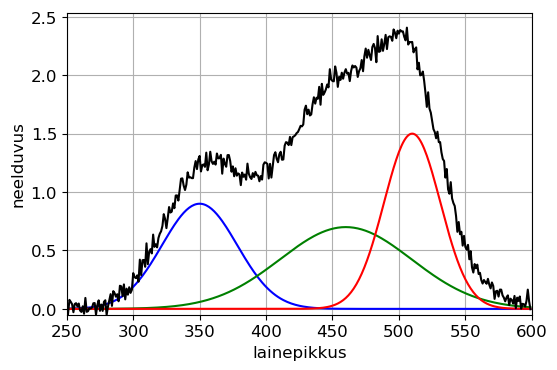

In [6]:
gauss = lambda x: exp(-x**2)  # neeldumisriba kuju
keskp = (350., 460., 510.)  # neeldumisribade asukohad
laius = (40., 70., 30.)     # laiused
amp   = (0.9, 0.7, 1.5)  # ja tugevused
λ = arange(250., 600., 1.)
komp = [a*gauss( (λ-k)/l ) for a,k,l in zip(amp,keskp,laius)]

for α in komp:
    plot(λ, α, '-')
    
X = np.column_stack(komp)
c = (1.2, 2.8, 0.7)  # tegelikud kontsentratsioonid
A = X.dot(c) + 0.05 * randn(len(λ))
plot(λ, A, 'k-')

xlim(250,600)
ylim(bottom=-0.05)
xlabel('lainepikkus')
ylabel('neelduvus')
grid()
show()

Nüüd võiks koostada võrrandi $(\vec{X}^\text{T}\vec{X})\vec{c}=\vec{X}^\text{T}\vec{A}$ ja lahendada selle funktsiooniga `numpy.linalg.solve`. Samas on selliste ülesannete jaoks olemas ka spetsiaalne funktsioon `numpy.linalg.lstsq`, millele saab anda kohe algsed andmed $\vec{X}$ ja $\vec{A}$:

mõõdetud: 1.202, 2.804, 0.704
tegelikud: 1.200, 2.800, 0.700


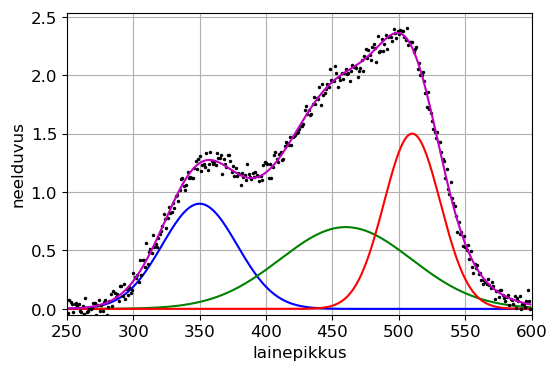

In [10]:
from numpy.linalg import lstsq
c1, _, _, _ = lstsq(X, A, rcond=None)
A1 = X.dot(c1)
fmt = ', '.join(['%.3f']*len(c1))
print('mõõdetud: ' + fmt % tuple(c1)  )
print('tegelikud: ' + fmt % c )

for α in komp:
    plot(λ, α, '-')
plot(λ, A, 'k.')
plot(λ, A1, 'm-')

xlim(250,600)
ylim(bottom=-0.05)
xlabel('lainepikkus')
ylabel('neelduvus')
grid()
show()

## Polünoom

Lineaarne seos $y=ax+b$ on lihtsalt 1-järku polünoom. Suvalist järku polünoomi sobitab läbi etteantud punktide (vähimruutude mõttes) funktsioon `numpy.polyfit`, mis tagastab optimaalse polünoomi kordajad NumPy massiivina (lineaarsel juhul tõus `a` ja algordinaat `b`).

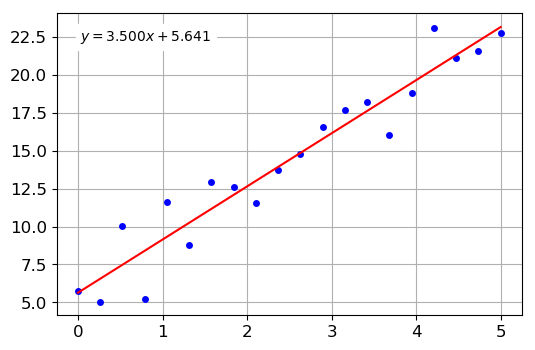

In [5]:
n = 20
X = linspace(0, 5, n)
Y = 3 * X + 7 + 2 * randn(n)
a, b = np.polyfit(X, Y, 1)
Y1 = a * X + b
plot(X, Y, 'bo')
plot(X, Y1, 'r-')
axtext(0.05, 0.95, '$y=%.3fx+%.3f$' % (a, b), va='top')
grid()
show()

Kõrgemat-järku polünoomi korral ei ole vajadust hakata ise polünoomi konstrueerima (st arvutama kordajate ja vastavate astmefunktsioonide korrutiste summat). Seda teeb funktsioon `numpy.polyval`.

Tegeliku polünoomi kordajad: [-0.35, 2.5, -4, 3]
Lähendatud polünoomi kordajad: [-0.35623879  2.54791922 -4.05360658  2.96169598]


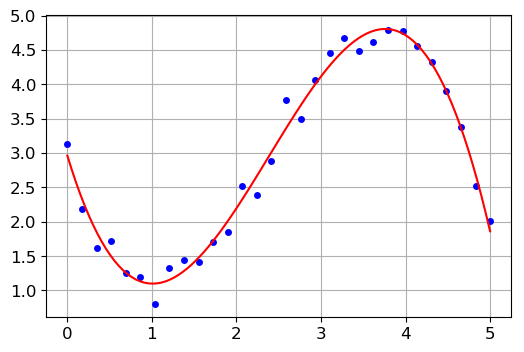

In [9]:
P = [-0.35, 2.5, -4, 3]
print('Tegeliku polünoomi kordajad:', P)
n = 30 # katsepunktide arv
X = linspace(0, 5, n)
Y = np.polyval(P, X) + 0.2 * randn(n)
P1 = np.polyfit(X, Y, 3)
print('Lähendatud polünoomi kordajad:', P1)
X1 = linspace(0, 5, 100) # sileda lähenduskõvera kuvamiseks rohkem punkte
Y1 = np.polyval(P1, X1)
plot(X, Y, 'bo')
plot(X1, Y1, 'r-')
grid()
show()

Moodulis `numpy.polynomial.chebyshev` on olemas funktsioonid `chebfit` ja `chebval`, mis lubavad täpselt sedasama protseduuri teostada Tšebõšovi polünoomide baasil.

## Mittelineaarne optimeerimine

Üldise optimeerimisülesande korral on antud meelevaldne sihifunktsioon $S(\vec p)$. Võime küll võrrandid $\partial S(\vec p)/\partial p_j=0$ kirja panna, aga on vähetõenäone, et neid õnnestub analüütilisel kujul lahendada. Sel juhul tuleb sihifunktsiooni miinimumi või maksimumi otsida iteratiivselt $m$-mõõtmelisel maastikul, ja peab olema alglähend $\vec{p}_0$, millest startida.

Oletagem, et me oleme lahendi otsimisel jõudnud punkti $\vec{p}_s$. Funktsiooni kiireima kasvamise või kahanemise sihti ja suunda selles punktis näitab *gradient* $\vec{\nabla}S$, kus $$(\vec{\nabla}S)_j=\frac{\partial S(\vec p)}{\partial p_j}.$$ Startides punktist $\vec{p}_s$ tuleks edasi liikuda punkti $\vec{p}_{s+1}=\vec{p}_s-\gamma \vec{\nabla}S$. Kui tegur $\gamma$ on piisavalt väike, siis on garanteeritud, et $S(\vec{p}_{s+1}) < S(\vec{p}_s)$. Seda protseduuri nimetatakse [kiireima languse meetodiks](https://en.wikipedia.org/wiki/Gradient_descent). Põhiraskus on siin $\gamma$ optimaalse väärtuse hindamine, kuid see on juba ühemõõtmeline probleem.

Gradient $\vec{\nabla}S$ võib üsna tugevasti mööda näidata sellest suunast, kus funktsiooni $S(\vec p)$ ekstreemum tegelikult asub. Seega iteratsioonisammude arv võib olla üsna suur. Mõeldav on arvutada punktis $\vec{p}_s$ ka sihifunktsiooni 2. järku osatuletised, mis karakteriseerivad juba sihifunktsiooni kõverust. Sel teel saab märksa täpsemalt ennustada optimumi asukohta. Seda nimetatakse [Newtoni meetodiks](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization).

On olemas rida algoritme, mis on otseselt ette nähtud vähimruutude ülesande lahendamiseks, st sihifunktsiooni $S(\vec p)=\sum \eps_i(\vec p)^2$ ekstreemumi leidmiseks (ükskõik mis on funktsioonide $\eps_i(\vec p)$ sisuline tähendus). Sel juhul optimum asub kohal kus $\sum_i\eps_i\partial\eps_i/\partial p_j=0$ ehk $\vec{J}^\text{T}\vec{\eps}=0$, kus maatriks $\vec{J}$ on *jakobiaan* elementidega $J_{ij}=\partial\eps_i/\partial p_j$. [Gauss-Newtoni meetodi](https://en.wikipedia.org/wiki/Gauss%E2%80%93Newton_algorithm) korral eeldatakse, et $\vec{p}_s$ on juba üsna lähedal $S(\vec p)$ miinimumile ja kõik funktsioonid $\eps_i(\vec p)$ muutuvad peaaegu lineaarselt $\vec{p}_s$ ümbruses, samas kui tuletised $J_{ij}$ muutuvad aeglaselt. Seega piisab kui lineariseerida funktsioonid $\eps_i(\vec p)$ punkti $\vec{p}_s$ ümbruses. See annab maatrikskujul tulemuseks $\vec{\eps}(\vec{p})=\vec{\eps}(\vec{p}_s)+\vec{J}(\vec{p}-\vec{p}_s)$, mis jällegi sisaldab jakobiaani $\vec{J}$. Asendame selle võrrandisüsteemi ja avaldame $$\vec p_{s+1}=\vec{p}_s-(\vec{J}^\text{T}\vec{J})^{-1}\vec{J}^\text{T}\vec{\eps}(\vec{p}_s).$$ Kuna funktsioonid $\eps_i(\vec p)$ on tegelikult siiski mittelineaarsed, siis ühe iteratsiooniga me ei pruugi miinimumi või maksimumi veel välja jõuda ja protseduuri tuleb korrata.

Vähimruutude ülesande korral ilmselt $\vec{\nabla}S=2\vec{J}^\text{T}\vec{\eps}$. Seega saame võrdlevalt mõlemad algoritmid kirja panna:
\begin{align*}
\vec p_{s+1}&=\vec{p}_s-(\vec{J}^\text{T}\vec{J})^{-1}\vec{J}^\text{T}\vec{\eps}(\vec{p}_s),\\
\vec p_{s+1}&=\vec{p}_s-\gamma\vec{J}^\text{T}\vec{\eps}(\vec{p}_s).
\end{align*}
Gauss-Newtoni meetodi puhul on ühe sammu tegemine ilmselt arvutusmahukam, aga protsess koondub kiiremini (kasutatakse täielikumalt ära jakobiaanis sisalduvat informatsiooni). Nimetatud kahte algoritmi seob (interpoleerib) [Levenberg-Marquardt'i algoritm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm), mis on tõenäoliselt levinuim algoritm mittelineaarsete funktsioonide sobitamisel vähimruutude meetodil.

Mittelineaarsete optimeerimisülesannete lahendamiseks leiab vahendeid moodulist `scipy.optimize`. Otseselt mittelineaarse funktsiooni sobitamiseks vähimruutude mõttes on ette nähtud funktsioon `curve_fit`, mis vaikimisi kasutabki Levenberg-Marquardt'i algoritmi. Selle kasutamiseks on tarvis defineerida lähendusfunktsioon, mille esimeseks argumendiks on sõltumatu muutuja ja ülejäänud argumendid on varieeritavad parameetrid. Üldjuhul läheb tarvis ka parameetrite alglähendeid. Funktsioon `curve_fit` tagastab nii parameetrite optimaalsed väärtused kui ka kovariatsioonimaatriksi, mille kaudu saab parameetrite statistilised veahinnangud. Järgmises näites sobitatakse "katseandmeid" funktsiooniga $y=ae^{-bx}$, kus $a$ ja $b$ on mudeli parameetrid. Märgime, et kui lähendusfunktsioonil on mitu parameetrit, võib osutuda mõistlikuks säilitada parameetrite väärtused mitte eraldi muutujates, vaid tervikliku järjendi või ennikuna (`P`), mille saab funktsiooni väljakutsel kergesti "lahti pakkida" (`*P`). Sel juhul mudelfunktsiooni definitsioon ja `P` algväärtustamine on ainsad kohad koodis, kus tuleb muudatusi teha (nt teistsuguse mudeli valikul).

optimeeritud parameetrid:
a= 1.192 ± 0.008
b= 0.701 ± 0.007
σ= 0.0104


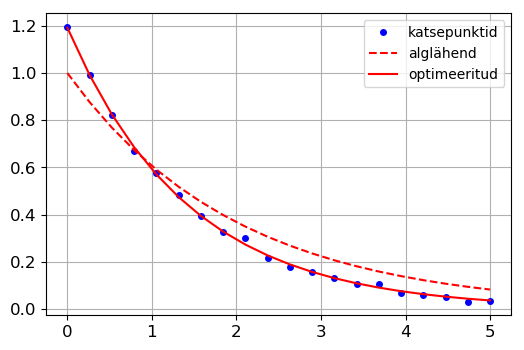

In [6]:
from scipy.optimize import curve_fit

# "eksperimentaalseid" punkte tekitame edaspidi selle funktsiooniga
# väljakutsel tohib *args asemel olla (a, b) või (a1, b1), (a2, b2) vms
# x võib olla skaalar või ndarray
def katse(x, *args):
    y = 0.
    for a, b in args:
        y += a * exp(-b*x)
    return y

# katseandmed
n = 20
X = linspace(0, 5, n)
Y = katse(X, (1.2, 0.7)) + 0.01*randn(n)

# mudel ja alglähend
f = lambda x, a, b: a * exp(-b*x)
U = ('a', 'b')  # parameetrite nimed aruande jaoks
S = lambda a, b: ((Y-f(X, a, b))**2).sum() # aruande jaoks
P0 = 1.0, 0.5
Y0 = f(X, *P0)
m = len(P0)

# optimeerimine
P, cov = curve_fit(f, X, Y, P0)
Δ = sqrt(np.diag(cov))
Y1 = f(X, *P)

# aruanne
print('optimeeritud parameetrid:')
for u,p,δ in zip(U,P,Δ):
    print( '%s=%6.3f ± %.3f' % (u,p,δ) )
print('σ= %.4f' % sqrt(S(*P) / (n-m)))

plot(X, Y, 'bo', label='katsepunktid')
plot(X, Y0, 'r--', label='alglähend')
plot(X, Y1, 'r-', label='optimeeritud')
grid()
legend()
show()

Uurime, kuidas näeb välja see "maastik", millel funktsiooni $S(a,b)$ miinimumi otsitakse:

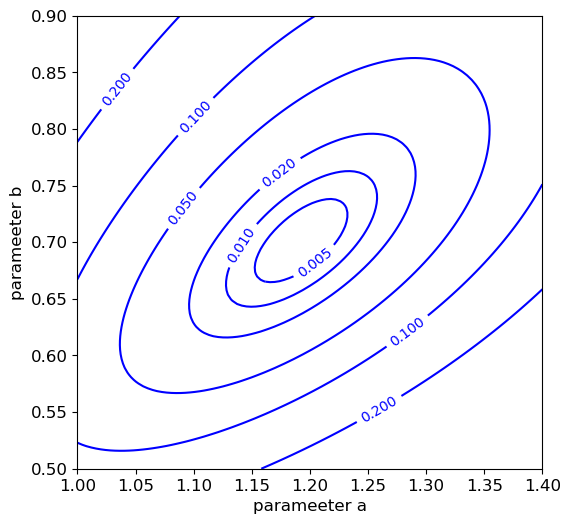

In [7]:
A = linspace(1.0, 1.4, 100)
B = linspace(0.5, 0.9, 100)
GX, GY = meshgrid(A, B)
V = np.vectorize(S)
GZ = V(GX, GY)
fig=figure(figsize=(6,6))
maastik = contour(GX, GY, GZ, colors='blue', levels=(0.005, 0.01, 0.02, 0.05, 0.1, 0.2))
clabel(maastik, inline=1, fontsize=10, fmt='%.3f')
xlabel('parameeter a')
ylabel('parameeter b')
show()

On mõeldav, et katsepunktide kaalud on erinevad, näiteks tingituna erinevast mõõtemääramatusest või sellest, et müra amplituud sõltub signaali tugevusest. Funktsioonile `curve_fit` saab parameetrina `sigma` anda y-väärtuste standardhälbed (kas siis absoluutses või suhtelises skaalas). Näitena vaatleme selliseid andmeid, kus signaali tugevus muutub mitu suurusjärku, kusjuures müra iseloomu tõttu katsepunktide määramatus (standardhälve) on võrdeline ruutjuurega signaali tugevusest (haavelmüra). See tähendab et nõrgema signaaliga punkte tuleks arvesse võtta suurema kaaluga. See osutub hädavajalikuks vähemalt juhul kui katseandmed sisaldavad mudeliga mittekirjeldatud moonutust tugeva signaali piirkonnas (katseta, kuidas tulemus muutub, kui `curve_fit` väljakutsel kõrvaldada parameetrid `sigma=Σ, absolute_sigma=True`). Siin "katseandmed" on põhiosas kirjeldatavad mudeliga $y=a_1e^{-b_1x}+a_2e^{-b_2x}$ (st kaks lõikuvat sirget logaritmilises skaalas), kuid vähesel määral on olemas ka kolmas, kiire komponent $a_3e^{-b_3x}$, mis on graafikul praktiliselt tuvastamatu.

a1= 15264.477 ± 52.0432
b1=     0.072 ±  0.0004
a2=   599.973 ± 37.3117
b2=     0.021 ±  0.0005
χ2= 1.153


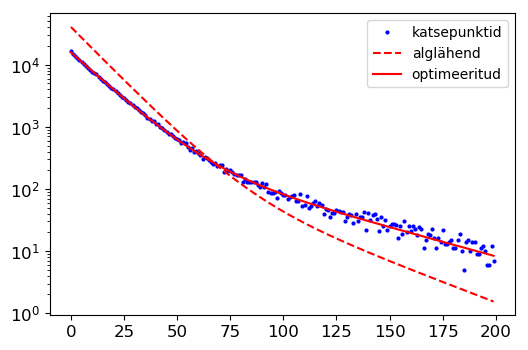

In [8]:
from scipy.optimize import curve_fit

# katseandmed
X = arange(0., 200., 1.)
Y = katse(X, (1000, 0.6), (15000, 0.07), (500, 0.02))
Y = poisson(Y)  # siin lisame haavelmüra
Σ = sqrt(Y)
n = len(X)

# mudel ja alglähend
f = lambda x, a1, b1, a2, b2: a1*exp(-b1*x) + a2*exp(-b2*x)
U = ('a1', 'b1', 'a2', 'b2')  # parameetrite nimed aruande jaoks
P0 = 40000, 0.08, 600, 0.03
Y0 = f(X, *P0)
m = len(P0)

# optimeerimine
P, cov = curve_fit(f, X, Y, P0, sigma=Σ, absolute_sigma=True)
#P, cov = curve_fit(f, X, Y, P0)
Δ = sqrt(np.diag(cov))
Y1 = f(X, *P)
χ2 = (((Y - Y1)/Σ)**2).sum() / (n - m)

# aruanne
for u,p,δ in zip(U,P,Δ):
    print( '%s=%10.3f ± %7.4f' % (u,p,δ) )
print( 'χ2= %.3f' % χ2 )

plot(X, Y, 'b.', label='katsepunktid')
plot(X, Y0, 'r--', label='alglähend')
plot(X, Y1, 'r-', label='optimeeritud')
yscale('log')
legend()
show()